<a href="https://colab.research.google.com/github/SarahAlhugail/Machine_learning/blob/main/Day12_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Group members:**

*   Sarah Alhugail 
*   Mashael Al-saeed
*   Abeer Alghamdi






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_palette('Set3')

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

<center><H1>KMeans Clustering</H1></center>

<p align="center">
  <img width="400" height="350" src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">
</p>

### Data
- [Dog & Horse](https://github.com/gumdropsteve/datasets/blob/master/dog_or_horse.csv)
- [Seattle Rain](https://github.com/gumdropsteve/datasets/blob/master/seattle_weather_1948-2017.csv)


### Steps

**All the libraries you need have been imported for you**

**Work through at least 2 of preloaded datasets and:**
- [Standardize your Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Create Elbow Plot to Determine Clusters
- Apply [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Plot Results of Actual Results Compared to KMeans Cluster Labels
- Determine Accuracy Score if true labels are known

### 🧞‍♂️BONUS🧞‍♀️
- Complete all 3 preloaded datasets

#### Dog Horse KMeans Challenge

In [ ]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
df_dh.sample(3)

,height,weight,target,type
46,31.0,40.0,0.0,dog
15,34.0,55.0,0.0,dog
63,26.0,96.0,0.0,dog


In [ ]:
df_dh.shape

(200, 4)

In [ ]:
from sklearn.model_selection import train_test_split


x = df_dh.drop(['target','type'], axis = 1)
y = df_dh.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75)

In [ ]:
# Scale Data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)



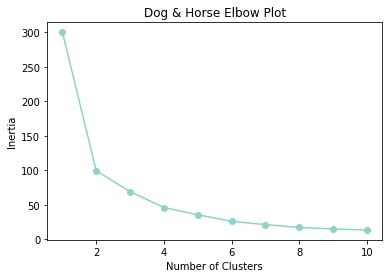

In [ ]:
# Create Elbow Plot
import matplotlib.pyplot as plt

inertia_ls = [] # save inertia values
for cluster in range(1, 11): # test different n_clusters between 1-10
    km = KMeans(n_clusters=cluster)
    km.fit(x_train) # apply KMeans
    inertia_ls.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 11)], inertia_ls, marker="o")
plt.title("Dog & Horse Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

In [ ]:
# Apply KMeans and Plot KMeans Results and Actual Results
from sklearn.cluster import KMeans

k = KMeans(n_clusters=2)


In [ ]:
k_fit = k.fit(x_train)

preds = k.labels_
preds

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int32)

In [ ]:
y_train

157    1.0
102    1.0
168    1.0
108    1.0
77     0.0
      ... 
31     0.0
123    1.0
194    1.0
199    1.0
132    1.0
Name: target, Length: 150, dtype: float64

In [ ]:
# Compute Accuracy Score of KMean Labels with True Labels
from sklearn.metrics import accuracy_score

accuracy_score(y_train, preds)

0.06666666666666667

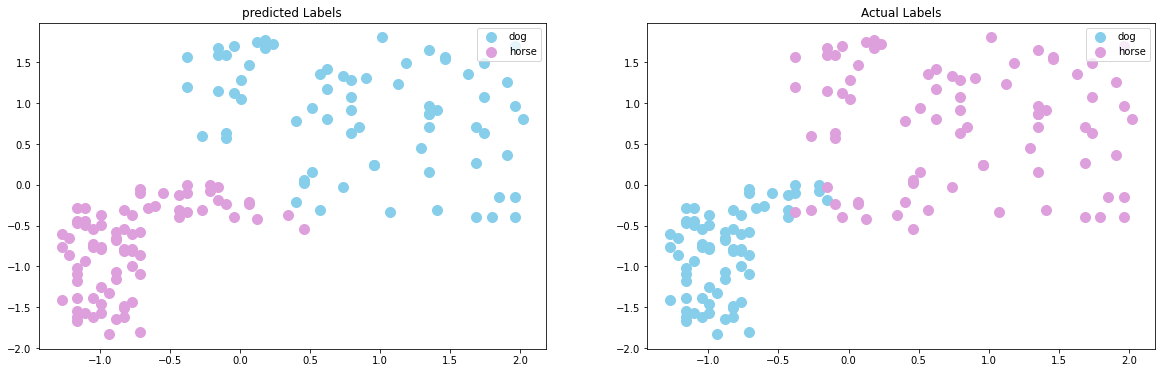

In [ ]:
#Visualising the predicted clusters
plt.figure(figsize=(20,6))
plt.subplot(1 , 2 , 1)
plt.title('predicted Labels')
plt.scatter(x_train[preds == 0, 0], x_train[preds == 0, 1], s = 100, c = 'skyblue', label = 'dog')
plt.scatter(x_train[preds == 1, 0], x_train[preds == 1, 1], s = 100, c = 'plum', label = 'horse')
plt.legend(loc='upper right');

plt.subplot(1 , 2, 2)
plt.title('Actual Labels')
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], s = 100, c = 'skyblue', label = 'dog')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], s = 100, c = 'plum', label = 'horse')

plt.legend(loc='upper right');

#### Seattle Weather KMeans Challenge

In [ ]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
df_sea.sample(3)

,ds,prcp,tmax,tmin,rain
3630,1957-12-09,0.0,49,35,False
22764,2010-04-29,0.0,58,43,False
17738,1996-07-25,0.0,91,61,False


In [ ]:
df_sea.isnull().sum()

ds      0
prcp    3
tmax    0
tmin    0
rain    3
dtype: int64

In [ ]:
df_sea = df_sea.dropna()

In [ ]:
df_sea.isnull().sum()

ds      0
prcp    0
tmax    0
tmin    0
rain    0
dtype: int64

In [ ]:
df_sea.rain.value_counts()


False    14648
True     10900
Name: rain, dtype: int64

In [ ]:
# convert target values to 0 and 1 - binary

from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
df_sea.rain= label_encoding.fit_transform(df_sea.rain.astype(str))
df_sea.rain.head()

0    1
1    1
2    1
3    1
4    1
Name: rain, dtype: int64

In [ ]:
label_encoding.classes_ # 0 -> ('False') , 1 -> ('True')

array(['False', 'True'], dtype=object)

In [ ]:
x = df_sea.drop(['ds','rain'], axis = 1)
y = df_sea.rain

In [ ]:
# Scale Data
x = ss.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.75)

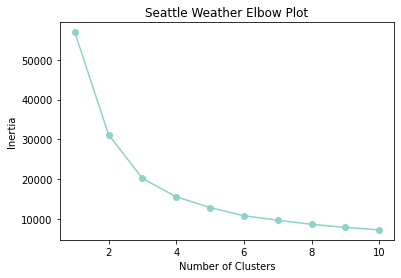

In [ ]:
# Create Elbow Plot
import matplotlib.pyplot as plt

inertia_ls = [] # save inertia values
for cluster in range(1, 11): # test different n_clusters between 1-10
    km = KMeans(n_clusters=cluster)
    km.fit(x_train) # apply KMeans
    inertia_ls.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 11)], inertia_ls, marker="o")
plt.title("Seattle Weather Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

In [ ]:
# Apply KMeans and Plot KMeans Results and Actual Results
from sklearn.cluster import KMeans

k = KMeans(n_clusters=2)

k.fit(x_train)

preds = k.labels_


In [ ]:
df_sea.shape

(25548, 5)

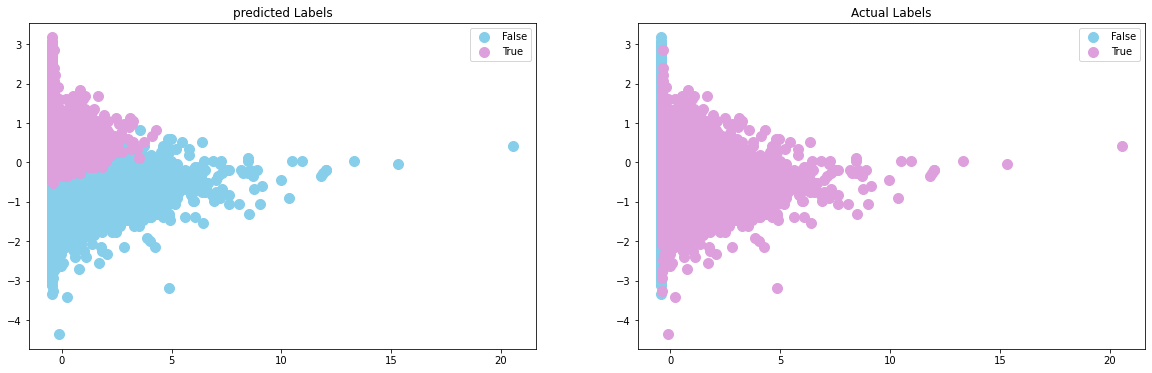

In [ ]:
#Visualising the predicted clusters
plt.figure(figsize=(20,6))
plt.subplot(1 , 2 , 1)
plt.title('predicted Labels')
plt.scatter(x_train[preds == 0, 0], x_train[preds == 0, 1], s = 100,  c = 'skyblue', label = 'False')
plt.scatter(x_train[preds == 1, 0], x_train[preds == 1, 1], s = 100, c = 'plum', label = 'True')
plt.legend(loc='upper right');

plt.subplot(1 , 2, 2)
plt.title('Actual Labels')
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], s = 100, c = 'skyblue', label = 'False')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], s = 100, c = 'plum', label = 'True')

plt.legend(loc='upper right');

In [ ]:
# Compute Accuracy Score of KMean Labels with True Labels
from sklearn.metrics import accuracy_score


accuracy_score(y_train, preds)


0.33761285945409947

#### Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


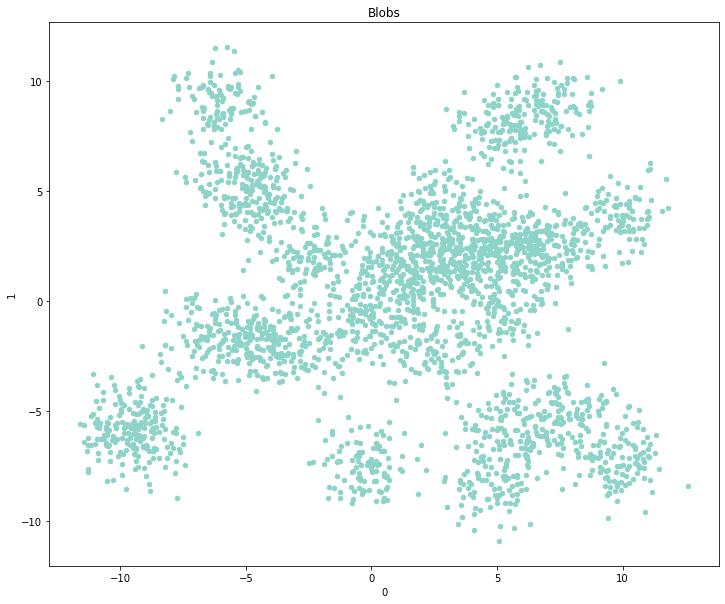

In [ ]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [ ]:
# Create scale

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_b = ss.fit_transform(df_blob)

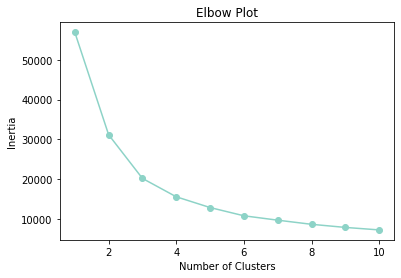

In [ ]:
# Create Elbow Plot
plt.plot([i for i in range(1, 11)], inertia_ls, marker="o")
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");


In [ ]:
# Apply KMeans and Plot KMeans Results

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_blob)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
preds = kmeans.labels_

preds

array([3, 2, 0, ..., 3, 3, 0], dtype=int32)

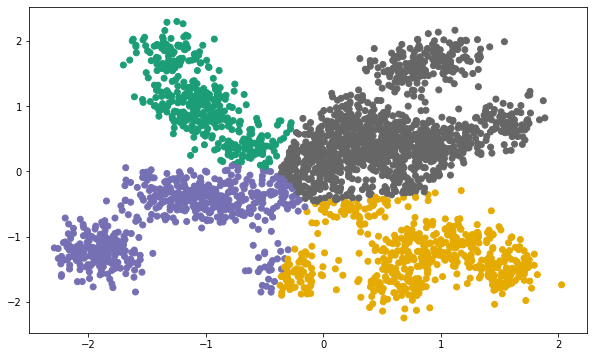

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x_b[:,0], x_b[:,1], c= preds, cmap="Dark2")